# Logistic Regression

In [49]:
import numpy as np
import scipy.io as sio 
import pylab as pl
%matplotlib inline

In [2]:
#Define sigmoid function
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [165]:
#Define cost function, X stands for input matrix
#y stands for the labels
def costFunc(X, y, theta):
    '''Calculate the errors of logistic regression'''
    if X is None or y is None:
        print 'Empty Input For Cost!'
        return None
    if len(X.shape) == 1 and len(theta) !=1 :
        print 'The dimensions do not match!'
        return None
    if len(X) != len(y) or X.shape[1] != len(theta):
        print 'The dimensions do not match!'
        return None
    m = len(y)#Length of y
    H = np.dot(X, theta)
    #print H
    Z = sigmoid(H)
    #print Z
    if 0 in Z or 1 in Z:
        print 'Zero data for log function!'
        return None
    total = np.dot(y, np.log(Z)) + np.dot(1-y, np.log(1-Z))
    if m>0:
        total = total/m
    else:
        print 'Zero data!'
        return None
    return -total     

In [229]:
#Update theta values
def trainLogisticRegression(X, y, alpha=0.01, num_iters=300):
    '''Update theta values'''
    #Deal with extreme cases
    if X is None or y is None:
        return None
    if len(X) != len(y):
        print 'The dimensions do not match!'
        return None 
    dim = X.shape
    sample_num = len(y)#the length of the samples
    feature_num = 0
    if dim>1:
        feature_num = X.shape[1]
    else:
        feature_num = 1
    input_train = np.insert(X, feature_num, 1, axis=1)#Insert the constant value
    theta = np.zeros(feature_num+1)
    feature_num = len(theta)#the number of features
    temp_theta = theta
    cost_iter = np.zeros(num_iters)#Record the cost each time
    for i in range(num_iters):
        #Update theta during each iteration
        for j in range(feature_num):
            diff = sigmoid(np.dot(input_train, theta)) - y
            temp_theta[j] = theta[j] - alpha *  np.dot(diff, input_train[:, j])/m
        theta = temp_theta
        #print theta
        cost_iter[i] = costFunc(input_train, y, theta)
    return theta, cost_iter

In [217]:
#Create a function to do predictions
def modelPredict(test, theta, threshold=0.5):
    '''Make predictions'''
    if len(test.shape) < 2:
        print 'The input has too few dimensions'
        return None
    feature_num = test.shape[1]
    sample_num = len(test)
    test = np.insert(test, feature_num, 1, axis=1)
    H = np.dot(test, theta)
    Z = sigmoid(H) 
    #print Z
    predictions = np.ones(sample_num)
    predictions[Z<threshold] = 0
    return predictions

Load input files from the text.

In [156]:
file = open('ex2data1.txt')
data = []
for line in file:
    numbers = line.strip('\n').split(',')
    data.append(numbers)
data = np.float32(data)

In [157]:
data.shape

(100, 3)

In [158]:
X = data[:, :2]
y = data[:, 2]

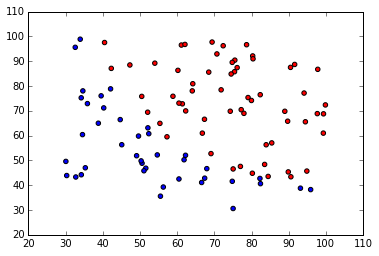

In [159]:
color = []
for i in y:
    if i>0:
        color.append('r')
    else:
        color.append('b')
pl.scatter(X[:, 0], X[:, 1], c=color)

In [237]:
[theta, costs] = trainLogisticRegression(X, y, alpha=0.002, num_iters=5000)

In [238]:
costs

array([ 0.67790118,  0.67347506,  0.67190179, ...,  0.58501481,
        0.5850066 ,  0.58499839])

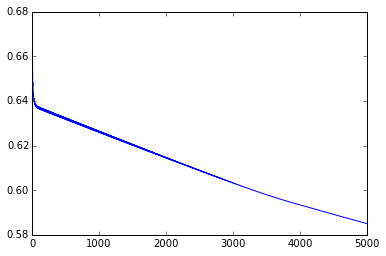

In [239]:
pl.plot(costs)

In [233]:
theta

array([ 0.0201469 , -0.00713329, -0.13852045])

In [241]:
modelPredict(X, theta, threshold=0.6)

[ 0.57323365  0.50909212  0.57065839  0.6743395   0.72120412  0.58178567
  0.68988606  0.67413552  0.72601567  0.70096739  0.72996205  0.65395952
  0.73229987  0.71730078  0.58855946  0.65712217  0.66196369  0.65039628
  0.71576919  0.6818398   0.64344867  0.74214193  0.59150526  0.52433678
  0.71046267  0.66079449  0.68893369  0.72236156  0.63382794  0.57056334
  0.66139666  0.71972656  0.61650375  0.62468499  0.58443316  0.61090398
  0.59925448  0.68083704  0.66712271  0.56774     0.71426986  0.59246565
  0.75543272  0.69088081  0.58922622  0.63756642  0.70992181  0.78546945
  0.69330918  0.77122743  0.72262651  0.76402052  0.71978948  0.54829168
  0.59189696  0.60297535  0.767597    0.58992043  0.69992888  0.70240525
  0.72201579  0.53234327  0.59922469  0.51629075  0.59416382  0.63835485
  0.62095156  0.59031066  0.74349398  0.6645597   0.51745026  0.67683406
  0.72466015  0.65863943  0.65666449  0.77688387  0.63299465  0.62752495
  0.61870614  0.69295943  0.74426967  0.73520666  0

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [236]:
y

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)